# Importing Basic Packages needed

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Read Data

In [38]:
df_data=pd.read_csv('/content/marketing_campaign.csv',sep=";")

In [39]:
df_data.shape

(2240, 29)

# Rows_Count : 2240
# Column_Count : 29

In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2216 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Education            2216 non-null   object         
 1   Income               2216 non-null   float64        
 2   Kidhome              2216 non-null   int64          
 3   Teenhome             2216 non-null   int64          
 4   Recency              2216 non-null   int64          
 5   Wines                2216 non-null   int64          
 6   Fruits               2216 non-null   int64          
 7   Meat                 2216 non-null   int64          
 8   Fish                 2216 non-null   int64          
 9   Sweets               2216 non-null   int64          
 10  Gold                 2216 non-null   int64          
 11  NumDealsPurchases    2216 non-null   int64          
 12  NumWebPurchases      2216 non-null   int64          
 13  NumCatalogPurchases  22

In [59]:
df_data.head(3)

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,663 days,64,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,113 days,67,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,312 days,56,776,Partner,0,2,0


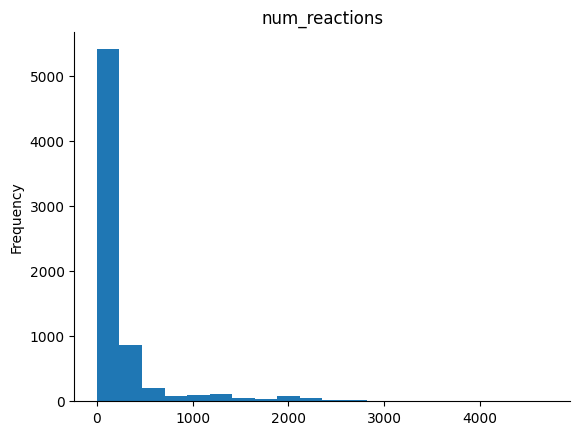

In [ ]:
# @title num_reactions
from matplotlib import pyplot as plt
df_data['num_reactions'].plot(kind='hist', bins=20, title='num_reactions')
plt.gca().spines[['top', 'right',]].set_visible(False)

# Drop the rows having NULL Values

In [41]:
df_data = df_data.dropna()


In [42]:
df_data["Dt_Customer"] = pd.to_datetime(df_data["Dt_Customer"])

In [43]:
dates=[x.date() for x in df_data["Dt_Customer"]]


In [12]:
dates = []
for i in df_data["Dt_Customer"]:
    i = i.date()
    dates.append(i)
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in therecords:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))

The newest customer's enrolment date in therecords: 2014-06-29
The oldest customer's enrolment date in the records: 2012-07-30


In [13]:
dates

[datetime.date(2012, 9, 4),
 datetime.date(2014, 3, 8),
 datetime.date(2013, 8, 21),
 datetime.date(2014, 2, 10),
 datetime.date(2014, 1, 19),
 datetime.date(2013, 9, 9),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 5, 8),
 datetime.date(2013, 6, 6),
 datetime.date(2014, 3, 13),
 datetime.date(2012, 11, 13),
 datetime.date(2013, 11, 15),
 datetime.date(2013, 11, 15),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 11, 24),
 datetime.date(2012, 12, 24),
 datetime.date(2012, 8, 31),
 datetime.date(2013, 3, 28),
 datetime.date(2012, 11, 3),
 datetime.date(2012, 8, 8),
 datetime.date(2013, 1, 6),
 datetime.date(2012, 12, 23),
 datetime.date(2014, 1, 11),
 datetime.date(2013, 3, 18),
 datetime.date(2013, 1, 2),
 datetime.date(2013, 5, 27),
 datetime.date(2013, 5, 31),
 datetime.date(2013, 11, 22),
 datetime.date(2014, 5, 22),
 datetime.date(2013, 5, 11),
 datetime.date(2012, 10, 10),
 datetime.date(2012, 10, 29),
 datetime.date(2013, 2, 20),
 datetime.date(2013, 8, 29),
 datetime.d

In [44]:
daysx= [max(dates)-x   for x in dates]

In [21]:
daysx

[datetime.timedelta(days=663),
 datetime.timedelta(days=113),
 datetime.timedelta(days=312),
 datetime.timedelta(days=139),
 datetime.timedelta(days=161),
 datetime.timedelta(days=293),
 datetime.timedelta(days=593),
 datetime.timedelta(days=417),
 datetime.timedelta(days=388),
 datetime.timedelta(days=108),
 datetime.timedelta(days=593),
 datetime.timedelta(days=226),
 datetime.timedelta(days=226),
 datetime.timedelta(days=627),
 datetime.timedelta(days=582),
 datetime.timedelta(days=552),
 datetime.timedelta(days=667),
 datetime.timedelta(days=458),
 datetime.timedelta(days=603),
 datetime.timedelta(days=690),
 datetime.timedelta(days=539),
 datetime.timedelta(days=553),
 datetime.timedelta(days=169),
 datetime.timedelta(days=468),
 datetime.timedelta(days=543),
 datetime.timedelta(days=398),
 datetime.timedelta(days=394),
 datetime.timedelta(days=219),
 datetime.timedelta(days=38),
 datetime.timedelta(days=414),
 datetime.timedelta(days=627),
 datetime.timedelta(days=608),
 datetime

In [45]:
df_data["Customer_For"] = daysx


# Feature Engineering

In [46]:
# Age
df_data['Age'] = 2021 - df_data['Year_Birth']

In [47]:
# Amount Spent
df_data["Spent"] = df_data["MntWines"]+ df_data["MntFruits"]+ df_data["MntMeatProducts"]+ df_data["MntFishProducts"]+ df_data["MntSweetProducts"]+ df_data["MntGoldProds"]

In [49]:
df_data["Marital_Status"].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [50]:
# Derive Livining With
df_data["Living_With"] = df_data["Marital_Status"].replace({"Together":"Partner", "Married":"Partner", "Divorced":"Alone", "Widow":"Alone", "Alone":"Alone","Absurd":"Alone","YOLO":"Alone","Single":"Alone"})

In [52]:
df_data["Living_With"].unique()

array(['Alone', 'Partner'], dtype=object)

In [53]:
df_data["Children"]=df_data["Teenhome"]+df_data["Kidhome"]

In [80]:
df_data["Age"].unique()

array([ 64,  67,  56,  37,  40,  54,  50,  36,  47,  71,  45,  62,  69,
        34,  75,  41,  72,  39,  42,  70,  52,  32,  58,  51,  48,  78,
        46,  25,  53,  57,  44,  43,  66,  55,  33,  73,  63,  49,  61,
        38,  76,  30,  59,  68,  65,  29,  60, 121,  35, 128,  31,  74,
       122,  28,  27,  80,  77,  26,  81])

In [55]:
df_data["Family_Size"] = df_data["Living_With"].replace({"Alone": 1, "Partner":2})+ df_data["Children"]

In [57]:
#Feature pertaining parenthood
df_data["Is_Parent"] = np.where(df_data.Children> 0, 1, 0)

#Segmenting education levels in three groups
df_data["Education"]=df_data["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df_data=df_data.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df_data = df_data.drop(to_drop, axis=1)

In [66]:
df_stats=df_data.describe().T

In [67]:
df_stats.to_csv('new_stats.csv', index=True)

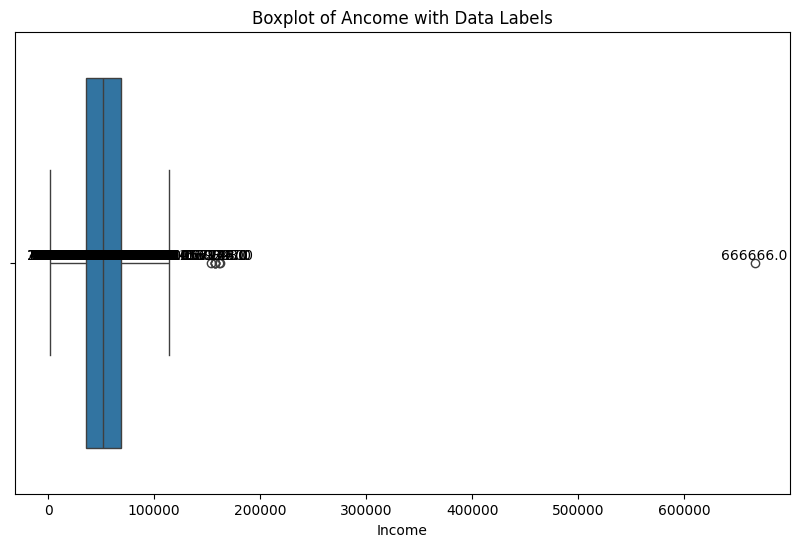

In [83]:
# prompt: plot boxplot for Income with datalabels

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe
#df_data = pd.read_csv('/content/marketing_campaign.csv', sep=";")

# Drop rows with NULL values
#df_data = df_data.dropna()

# Assuming 'Income' column exists, create the boxplot
plt.figure(figsize=(10, 6))
ax = sns.boxplot(x=df_data['Income'])

# Add data labels
for x in df_data['Income']:
    plt.text(x, 0, str(x), ha='center', va='bottom')  # Adjust vertical alignment if needed

plt.title('Boxplot of Ancome with Data Labels')
plt.xlabel('Income')
plt.show()


In [82]:
df_data["Age"].min()

25